In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
from xgboost import XGBClassifier
import pickle



In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Cabin'].nunique()

147

In [5]:
pclass_3 = df.loc[df['Pclass'] == 3]

pclass_3['Fare'].mean()

13.675550101832993

In [6]:
df.loc[df['Age']<10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [7]:
df.drop('Cabin', axis = 1, inplace = True)

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
colors = ['powderblue', 'indigo', 'blue', 'slateblue', 'dodgerblue' , 'rebeccapurple' , 'navy', 'mediumpurple']


In [10]:
data = [1,2,3,4,5,6,7,8]
datay= [1,1,1,1,1,1,1,1]

In [11]:
def bar_plot(x_data, y_data, title, x_label, y_label, savefig):
    plt.figure(figsize=(14,8))    
    sns.set(rc={'axes.facecolor':'lightgrey'})
    ax = sns.barplot(x_data, y_data, edgecolor = 'black', palette = sns.color_palette(colors, 8))
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel(x_label, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 18)
    ax.tick_params(labelsize = 14)
    plt.tight_layout()
    plt.savefig(savefig)


In [12]:
def box_plot(data, title, savefig):
    plt.figure(figsize=(14,8))    
    sns.set(rc={'axes.facecolor':'lightgrey'})
    ax = sns.boxplot(data, color = 'powderblue')
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel('')
    ax.tick_params(labelsize = 14)
    plt.tight_layout()
    plt.savefig(savefig)


In [13]:
def scatter_plot(x_data, y_data, title, x_label, y_label, savefig):
    plt.figure(figsize=(14,8))
    sns.set(rc={'axes.facecolor':'lightgrey'})
    ax = sns.scatterplot(x_data, y_data, color = 'indigo', s = 60)
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel(x_label, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 18)
    ax.tick_params(labelsize = 14)
    plt.tight_layout()
    plt.savefig(savefig)
    

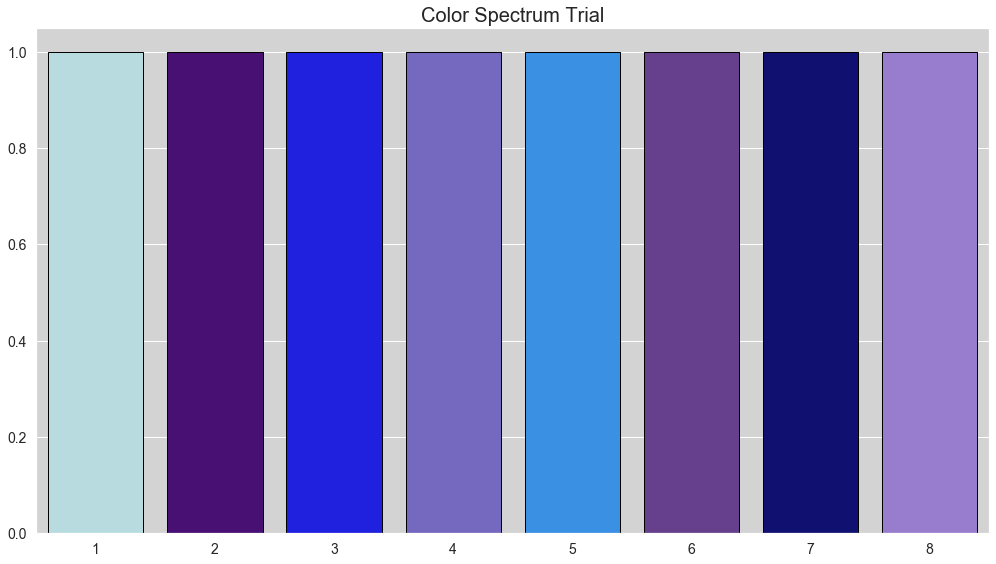

In [14]:
bar_plot(data, datay, 'Color Spectrum Trial', '', '', '')

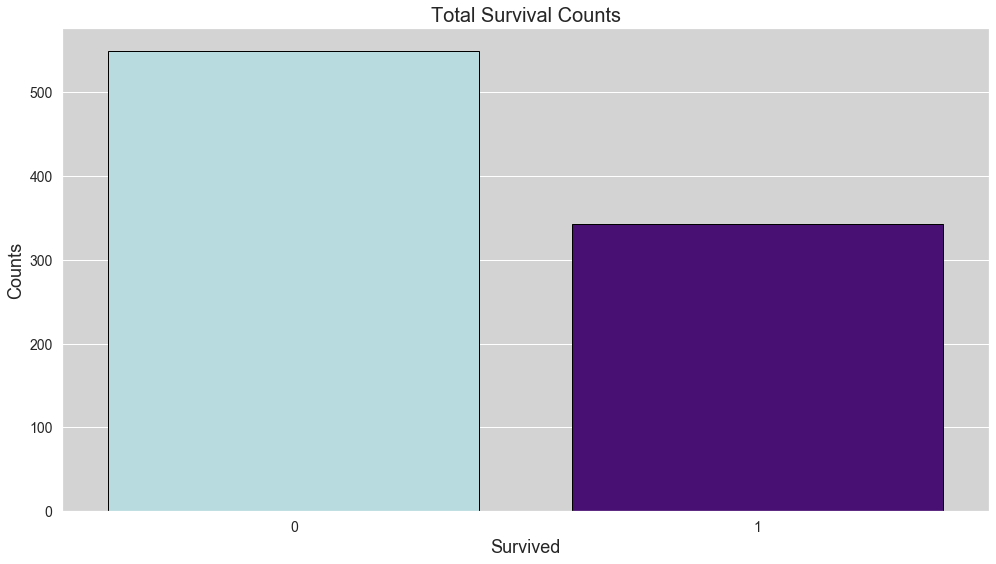

In [15]:
bar_plot(df['Survived'].unique(), df['Survived'].value_counts(),  'Total Survival Counts', 'Survived', 'Counts', 'images/total_survival_counts.png')

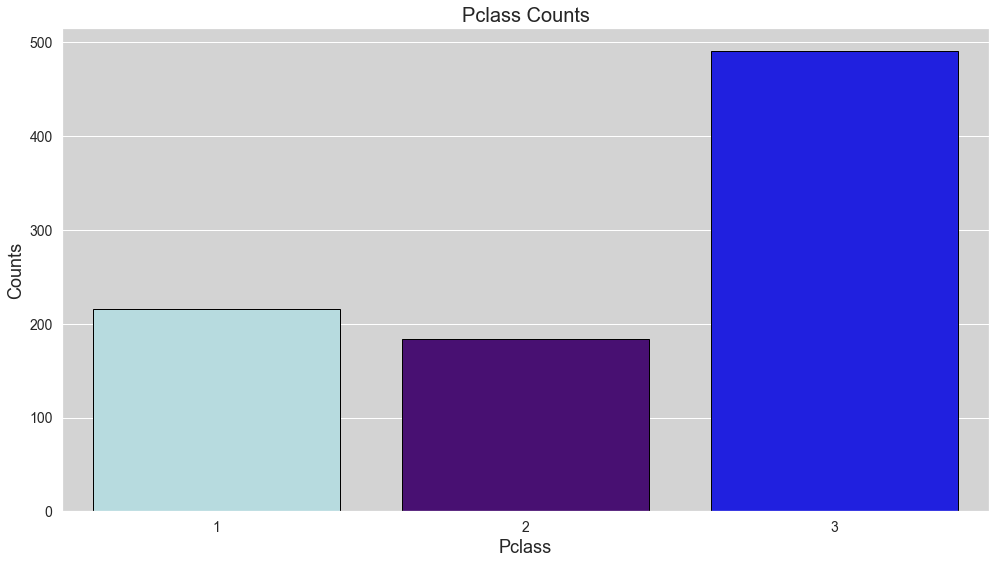

In [16]:
bar_plot(df['Pclass'].unique(), df['Pclass'].value_counts(),  'Pclass Counts', 'Pclass', 'Counts', 'images/total_pclass_counts.png')

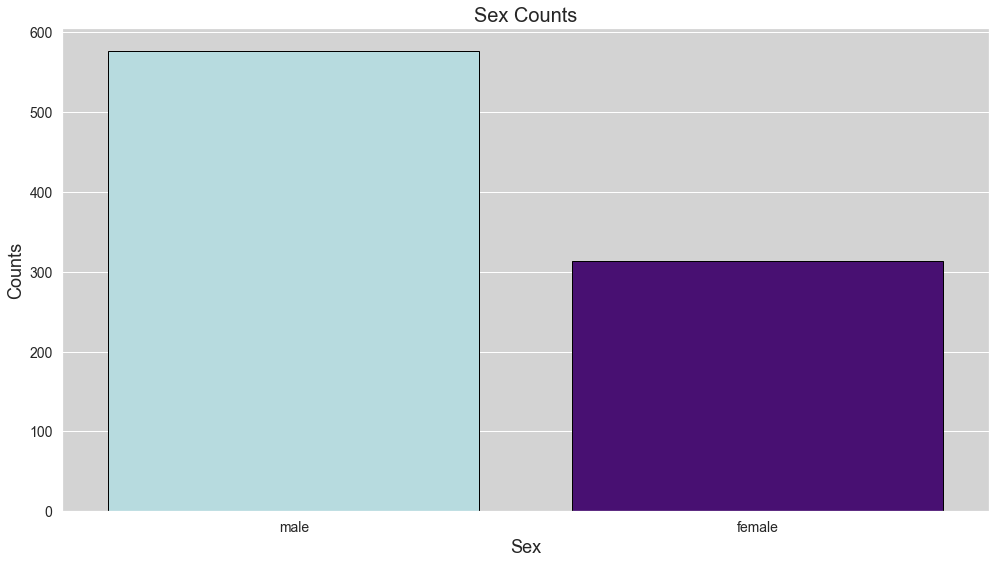

In [17]:
bar_plot(df['Sex'].unique(), df['Sex'].value_counts(),  'Sex Counts', 'Sex', 'Counts', 'images/total_sex_counts.png')

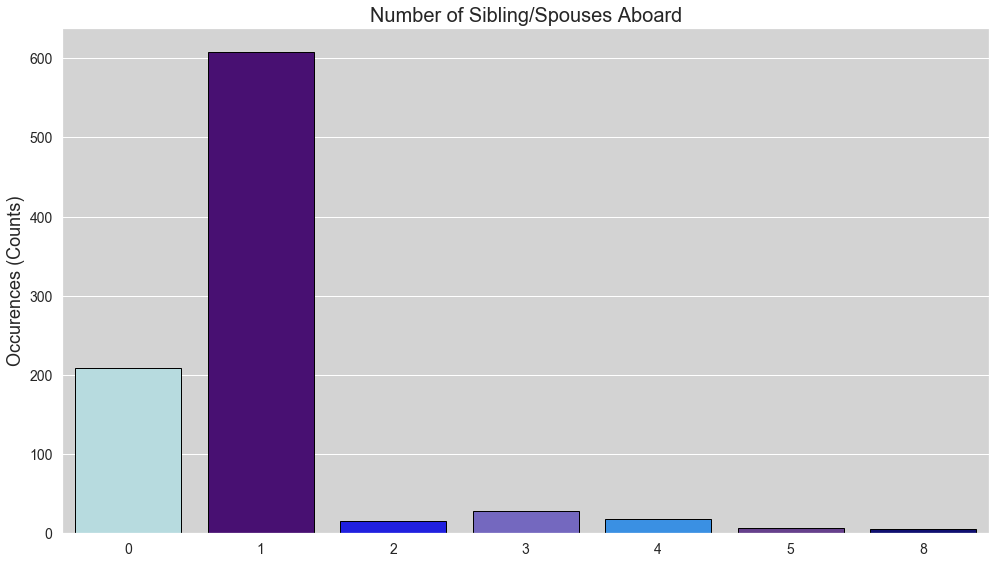

In [18]:
bar_plot(df['SibSp'].unique(), df['SibSp'].value_counts(),  'Number of Sibling/Spouses Aboard', '', 'Occurences (Counts)', 'images/sibling_spouse_counts.png')

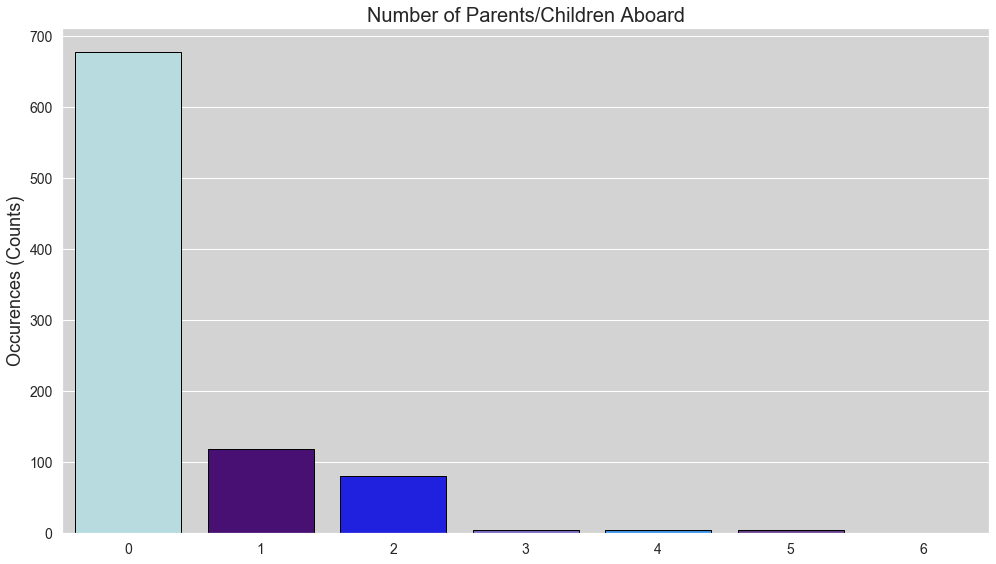

In [19]:
bar_plot(df['Parch'].unique(), df['Parch'].value_counts(),  'Number of Parents/Children Aboard', '', 'Occurences (Counts)', 'images/parent_children_counts.png')

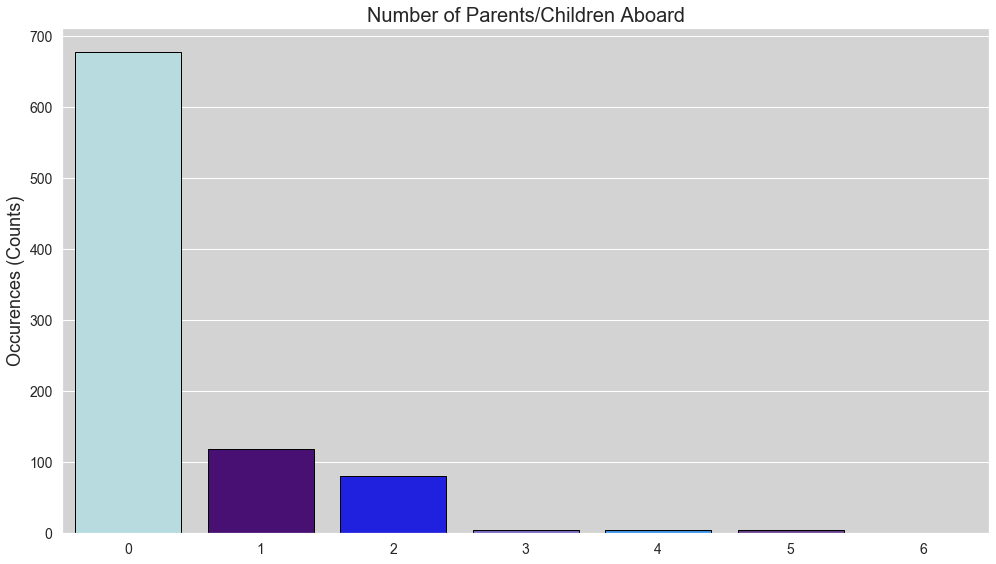

In [20]:
bar_plot(df['Parch'].unique(), df['Parch'].value_counts(),  'Number of Parents/Children Aboard', '', 'Occurences (Counts)', 'images/parent_children_counts.png')


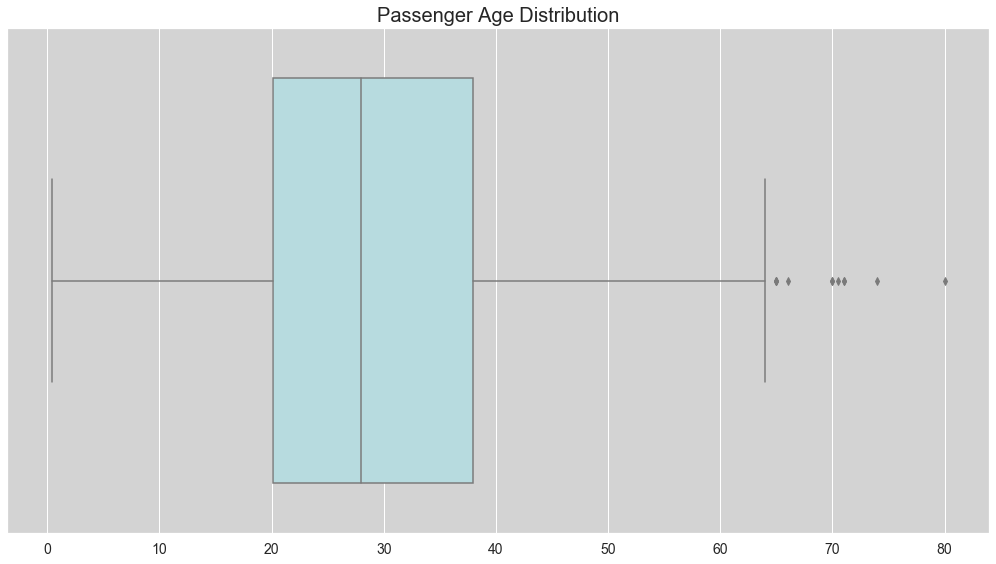

In [21]:
box_plot(df['Age'], 'Passenger Age Distribution', 'images/age_dist.png')

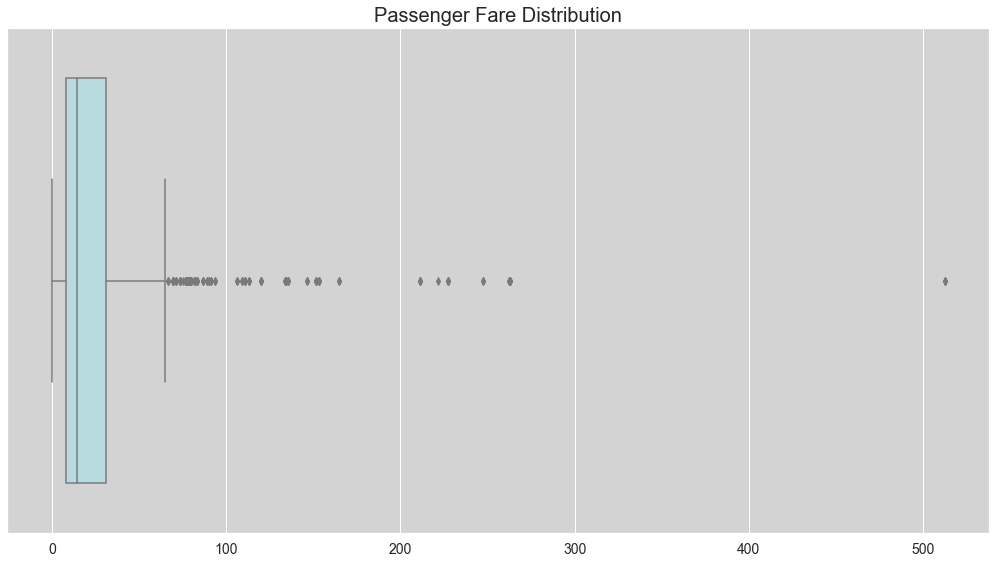

In [22]:
box_plot(df['Fare'], 'Passenger Fare Distribution', 'images/fare_dist.png')

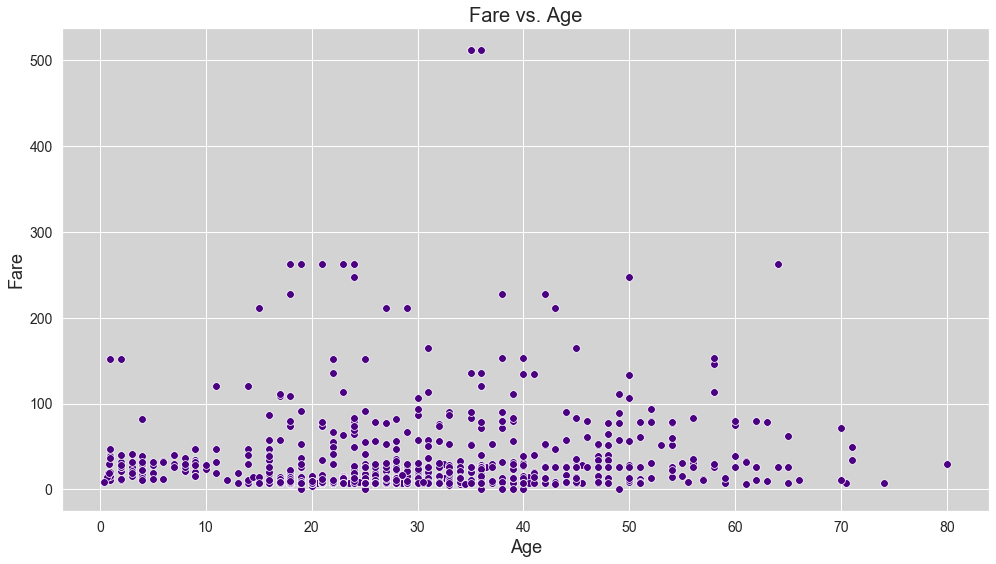

In [23]:
scatter_plot(df['Age'], df['Fare'], 'Fare vs. Age', 'Age', 'Fare', 'images/fare_vs_age.png')

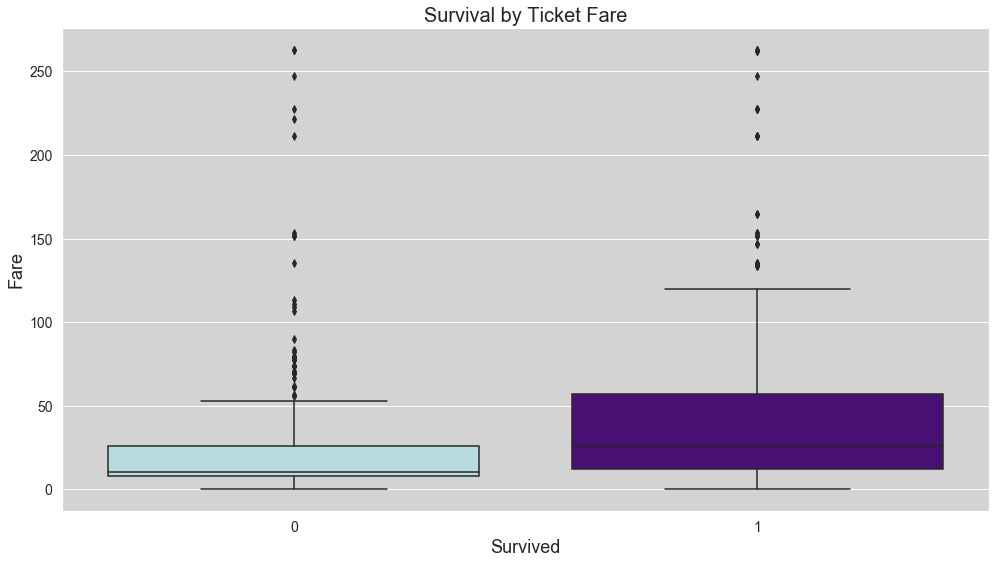

In [24]:
fare_outliers = df.copy()
fare_outliers = fare_outliers.loc[fare_outliers['Fare'] < 400]
plt.figure(figsize=(14,8)) 
ax = sns.boxplot(x=fare_outliers['Survived'], y=fare_outliers['Fare'], palette = sns.color_palette(colors, 8))
ax.set_title('Survival by Ticket Fare', fontsize = 20)
ax.set_xlabel('Survived', fontsize = 18)
ax.set_ylabel('Fare', fontsize = 18)
ax.tick_params(labelsize = 14)
plt.tight_layout()
plt.savefig('images/survival_by_fare.png')

In [25]:
class_survived_df = df.copy()
class_survived_df = pd.DataFrame(class_survived_df.groupby('Pclass')['Survived'].value_counts())
class_survived_df.rename(columns = {'Survived': 'Count'}, inplace = True)
class_survived_df.reset_index(inplace = True)
class_survived_df

,Pclass,Survived,Count
0,1,1,136
1,1,0,80
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


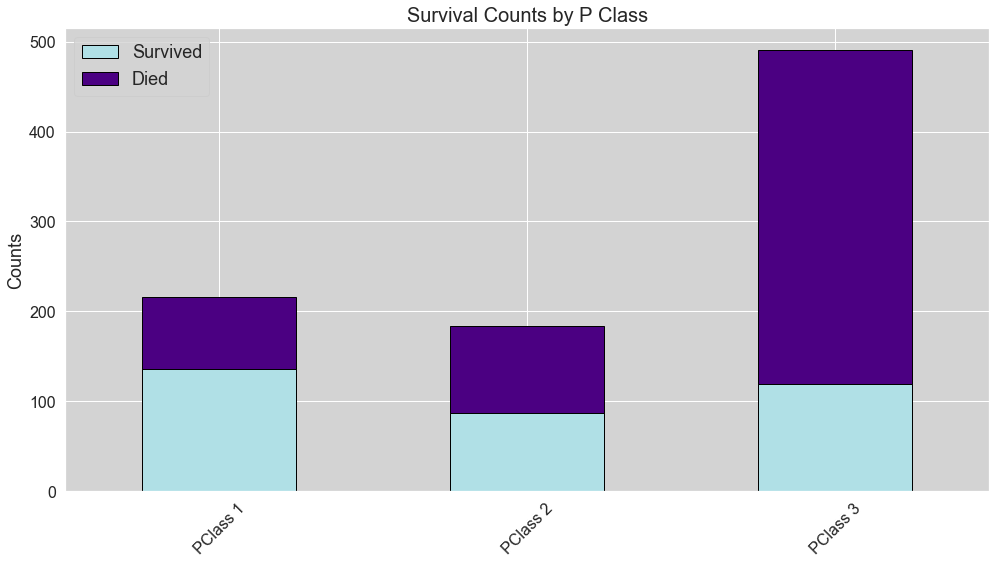

In [26]:
class_survival = pd.DataFrame({
    "Survived":[136, 87, 119],
    "Died":[80, 97, 372],
    }, 
    index=["PClass 1", "PClass 2", "PClass 3"]
)
class_survival.plot(kind="bar", color=['powderblue', 'indigo'], rot = 45, stacked = True, edgecolor = 'black', figsize = (14,8))
plt.ylabel('Counts', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc=2, prop={'size': 18})
plt.title('Survival Counts by P Class', fontsize = 20)
plt.tight_layout()
plt.savefig('images/surivals_by_pclass.png')



In [27]:
gender_survived_df = df.copy()
gender_survived_df = pd.DataFrame(gender_survived_df.groupby('Sex')['Survived'].value_counts())
gender_survived_df.rename(columns = {'Survived': 'Count'}, inplace = True)
gender_survived_df.reset_index(inplace = True)
gender_survived_df

,Sex,Survived,Count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


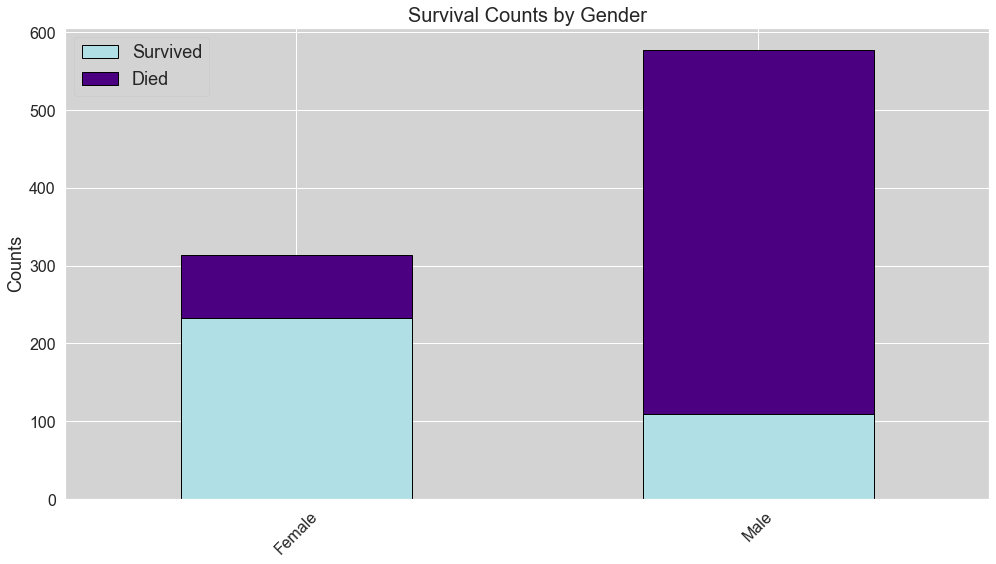

In [28]:
gender_survival = pd.DataFrame({
    "Survived":[233, 109],
    "Died":[81,468],
    }, 
    index=["Female", "Male"]
)
gender_survival.plot(kind="bar", color=['powderblue', 'indigo'], rot = 45, stacked = True, edgecolor = 'black', figsize = (14,8))
plt.ylabel('Counts', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc=2, prop={'size': 18})
plt.title('Survival Counts by Gender', fontsize = 20)
plt.tight_layout()
plt.savefig('images/surivals_by_gender.png')



In [29]:
df_prefixes = df.copy()

In [30]:
df_prefixes['LastName'] = df_prefixes['Name'].str.split(',').map(lambda x: x[0])

In [31]:
df_prefixes['NamePrefixRaw']= df_prefixes['Name'].str.split(', ').map(lambda x: x[1])

In [32]:
df_prefixes['NamePrefix']= df_prefixes['NamePrefixRaw'].str.split('.').map(lambda x: x[0])
df_prefixes.drop('NamePrefixRaw', axis = 1, inplace = True)

In [33]:
lastName_count_df = pd.DataFrame(df_prefixes.groupby('LastName')['Survived'].count())
lastName_count_df.rename(columns = {'Survived':'Count'}, inplace = True)
lastName_survived_df = pd.DataFrame(df_prefixes.groupby('LastName')['Survived'].sum())

lastName_df = lastName_count_df.join(lastName_survived_df)

In [34]:
families_df = lastName_df.loc[lastName_df['Count'] > 1]

In [35]:
family_survival_rate = families_df.copy()
family_survival_rate['SurvivalRate'] = family_survival_rate['Survived']/family_survival_rate['Count']
family_survival_rate['SurvivalRate'].mean()

0.4578111946532999

In [36]:
df_prefixes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Behr,Mr


In [37]:
pwa_df = df_prefixes.copy()
pwa_df = pwa_df.loc[pwa_df['Age'].notnull()]
pwa_grouped = pd.DataFrame(pwa_df.groupby('NamePrefix')['Age'].mean())
pwa_grouped


,Age
NamePrefix,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.773973


In [38]:
pwoa_df = df_prefixes.copy()
pwoa_df = pwoa_df.loc[pwoa_df['Age'].isna()]
pwoa_df['NamePrefix'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [39]:
pwoa_df.loc[pwoa_df['NamePrefix'] == 'Mr', 'Age']=32.368090
pwoa_df.loc[pwoa_df['NamePrefix'] == 'Mrs', 'Age']=35.898148
pwoa_df.loc[pwoa_df['NamePrefix'] == 'Miss', 'Age']=21.773973
pwoa_df.loc[pwoa_df['NamePrefix'] == 'Master', 'Age']=34.574167
pwoa_df.loc[pwoa_df['NamePrefix'] == 'Dr', 'Age']=42.000000


pwoa_df.set_index('PassengerId', inplace = True, drop = True)
pwoa_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,NamePrefix
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,Moran,Mr
18,1,2,"Williams, Mr. Charles Eugene",male,32.368090,0,0,244373,13.0000,S,Williams,Mr
20,1,3,"Masselmani, Mrs. Fatima",female,35.898148,0,0,2649,7.2250,C,Masselmani,Mrs
27,0,3,"Emir, Mr. Farred Chehab",male,32.368090,0,0,2631,7.2250,C,Emir,Mr
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.773973,0,0,330959,7.8792,Q,O'Dwyer,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,32.368090,0,0,2629,7.2292,C,Razi,Mr
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.773973,8,2,CA. 2343,69.5500,S,Sage,Miss
869,0,3,"van Melkebeke, Mr. Philemon",male,32.368090,0,0,345777,9.5000,S,van Melkebeke,Mr


In [40]:
pwa_df.set_index('PassengerId', inplace = True, drop = True)
pwa_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,NamePrefix
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,Rice,Mrs
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Montvila,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Graham,Miss


In [41]:
df_clean = pwa_df.append(pwoa_df)
df_clean.sort_index(inplace = True)

In [42]:
df_clean.dropna(inplace = True)

In [43]:
# df_clean['Ticket'].unique()

In [44]:
df_clean.drop(['Name', 'Ticket', 'LastName'], axis = 1, inplace = True)

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    object 
 8   NamePrefix  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [46]:
df_survived = pd.DataFrame(df_clean['Survived'])
df_survived.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [83]:
cat_cols_df = df_clean[['Pclass', 'Sex', 'Embarked', 'NamePrefix']].copy()
ohe = OneHotEncoder()
ohe.fit(cat_cols_df)
ohe_cat_cols = ohe.transform(cat_cols_df).toarray()
ohe_cat_cols_df = pd.DataFrame(ohe_cat_cols, columns = ohe.get_feature_names(cat_cols_df.columns), index=cat_cols_df.index)
ohe_cat_cols_df.drop(['NamePrefix_Capt', 'NamePrefix_Don', 'NamePrefix_Jonkheer', 'NamePrefix_Lady', 'NamePrefix_Major', 'NamePrefix_Mlle', 'NamePrefix_Mme', 'NamePrefix_Sir', 'NamePrefix_the Countess'], axis = 1, inplace = True)
ohe_cat_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass_1           889 non-null    float64
 1   Pclass_2           889 non-null    float64
 2   Pclass_3           889 non-null    float64
 3   Sex_female         889 non-null    float64
 4   Sex_male           889 non-null    float64
 5   Embarked_C         889 non-null    float64
 6   Embarked_Q         889 non-null    float64
 7   Embarked_S         889 non-null    float64
 8   NamePrefix_Col     889 non-null    float64
 9   NamePrefix_Dr      889 non-null    float64
 10  NamePrefix_Master  889 non-null    float64
 11  NamePrefix_Miss    889 non-null    float64
 12  NamePrefix_Mr      889 non-null    float64
 13  NamePrefix_Mrs     889 non-null    float64
 14  NamePrefix_Ms      889 non-null    float64
 15  NamePrefix_Rev     889 non-null    float64
dtypes: float64(16)
memory usag

In [84]:
scaler = StandardScaler()
cat_cols_list = ['Pclass', 'Sex', 'Embarked', 'NamePrefix', 'Survived']
num_cols_df = df_clean[df_clean.columns.difference(cat_cols_list)].copy()
num_cols_df = pd.DataFrame(scaler.fit_transform(num_cols_df),index=num_cols_df.index, columns=num_cols_df.columns)
num_cols_df.head()

,Age,Fare,Parch,SibSp
PassengerId,,,,
1,-0.597275,-0.500240,-0.474326,0.431350
2,0.621017,0.788947,-0.474326,0.431350
3,-0.292702,-0.486650,-0.474326,-0.475199
4,0.392587,0.422861,-0.474326,0.431350
5,0.392587,-0.484133,-0.474326,-0.475199


In [90]:
df_complete = num_cols_df.join(ohe_cat_cols_df.join(df_survived))
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                889 non-null    float64
 1   Fare               889 non-null    float64
 2   Parch              889 non-null    float64
 3   SibSp              889 non-null    float64
 4   Pclass_1           889 non-null    float64
 5   Pclass_2           889 non-null    float64
 6   Pclass_3           889 non-null    float64
 7   Sex_female         889 non-null    float64
 8   Sex_male           889 non-null    float64
 9   Embarked_C         889 non-null    float64
 10  Embarked_Q         889 non-null    float64
 11  Embarked_S         889 non-null    float64
 12  NamePrefix_Col     889 non-null    float64
 13  NamePrefix_Dr      889 non-null    float64
 14  NamePrefix_Master  889 non-null    float64
 15  NamePrefix_Miss    889 non-null    float64
 16  NamePrefix_Mr      889 non

In [86]:
y = df_complete['Survived']
X = df_complete.drop('Survived', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [87]:
def model_function(model_name, grid_name):
    """This function will take in the model and hyperparameter 
    grid search name, and will run and score the model"""

    grid = GridSearchCV(estimator = model_name,
                             param_grid = grid_name,
                             cv = None,
                             n_jobs = -1)

    grid.fit(X_train, y_train)
    
        
    filename = 'finalized_model.sav'
    pickle.dump(grid, open(filename, 'wb'))

    print(grid.best_params_)


    training_preds = grid.predict(X_train)
    test_preds = grid.predict(X_test)


    print('Training F1 Score: ', f1_score(y_train, training_preds, average = 'micro'))
    print('Test F1 Score: ', f1_score(y_test, test_preds, average = 'micro'))



In [88]:
def feature_importance(model_name, save_fig):    
    """This function will take in the model and hyperparameter grid 
    seach name and will plot feature importance for the model"""
    
    model_name.fit(X_train, y_train)
    model_name.feature_importances_
    n_features = X_train.shape[1]
    plt.figure(figsize = (16,18))
    plt.barh(range(n_features), model_name.feature_importances_,align = 'center', color = 'slateblue')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 14)
    plt.xlabel('Feature Importance', fontsize = 16)
    plt.grid(zorder=0)
    plt.savefig(save_fig)

    
    plt.show()
    

### highest F1 score: GradientBoostingClassifier

{'n_estimators': 20, 'random_state': 123}
Training F1 Score:  0.8588588588588588
Test F1 Score:  0.820627802690583


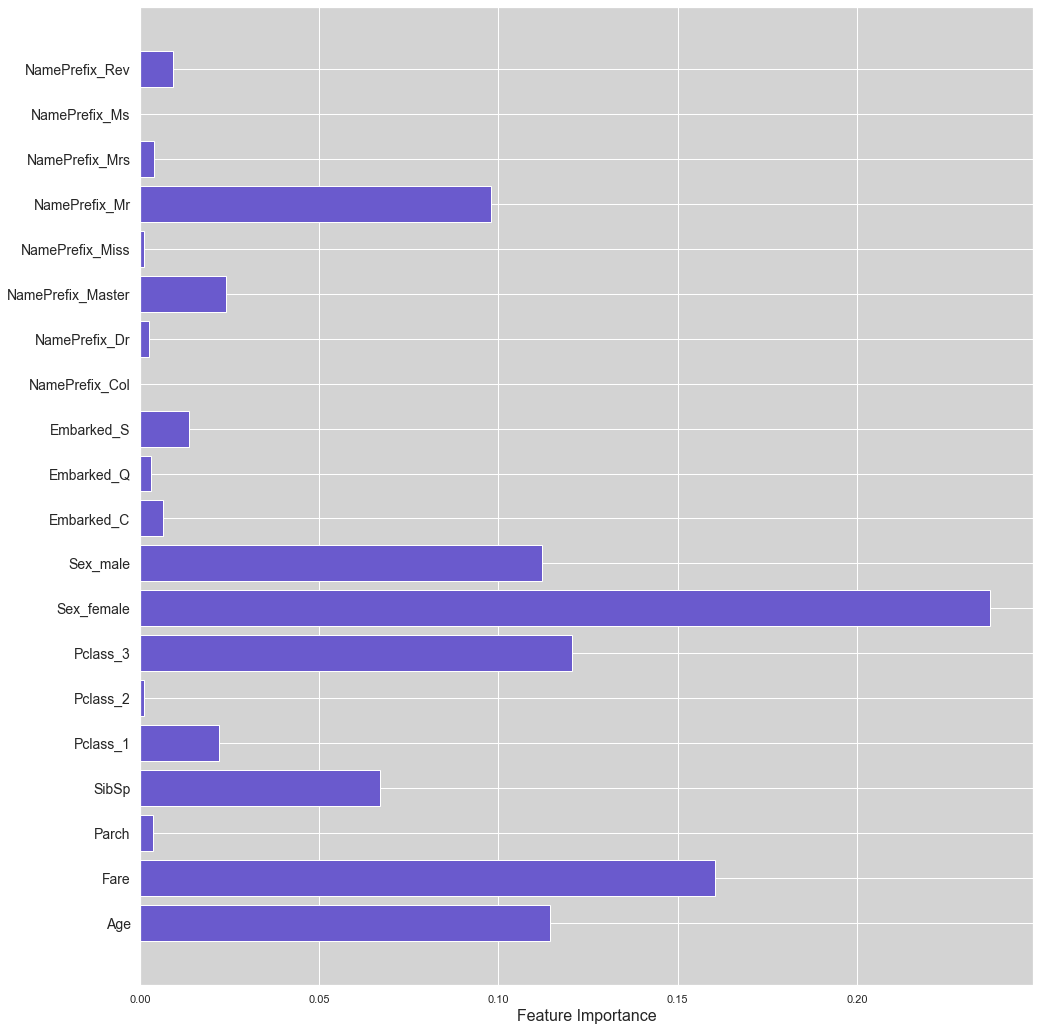

In [89]:
gbc = GradientBoostingClassifier()

gbc_parameters = {
            'n_estimators': [20, 25, 30, 35],
            'random_state': [123]
             }

model_function(gbc, gbc_parameters)
feature_importance(gbc, 'images/gbc_FI.png')

In [91]:
df_test_set = pd.read_csv('df_test_set.csv')
df_test_set.set_index('PassengerId', inplace = True)
df_test_set

,Age,Fare,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,NamePrefix_Col,NamePrefix_Dr,NamePrefix_Master,NamePrefix_Miss,NamePrefix_Mr,NamePrefix_Mrs,NamePrefix_Ms,NamePrefix_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,
892,0.333744,-0.497374,-0.400248,-0.499470,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
893,1.294308,-0.512238,-0.400248,0.616992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
894,2.446984,-0.464061,-0.400248,-0.499470,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
895,-0.242594,-0.482436,-0.400248,-0.499470,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
896,-0.626820,-0.417453,0.619896,0.616992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.169917,-0.493415,-0.400248,-0.499470,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.679547,1.314451,-0.400248,-0.499470,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.641124,-0.507756,-0.400248,-0.499470,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [92]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

In [93]:
result = loaded_model.predict(df_test_set)

In [99]:
df_test_set['Survived'] = result
submission = pd.DataFrame(df_test_set.iloc[:, -1])
submission.to_csv('titanic_submission.csv')

In [ ]:
# rfc = RandomForestClassifier()

# rfc_parameters = {
#                   'random_state': [123]
#                  }


# model_function(rfc, rfc_parameters)
# feature_importance(rfc, 'images/rfc_FI.png')

In [ ]:
# xgbc = XGBClassifier()

# xgbc_parameters = {
#             'n_estimators': [10,20,30],
#             'random_state': [123]
#              }

# model_function(xgbc, xgbc_parameters)
# feature_importance(xgbc, 'images/xgbc_FI.png')

In [ ]:
# etc = ExtraTreesClassifier()

# etc_parameters = {
#             'n_estimators': [10,20,30],
#             'random_state': [123]
#              }

# model_function(etc, etc_parameters)
# feature_importance(etc, 'images/etc_FI.png')

In [ ]:
# bc = BaggingClassifier()

# bc_parameters = {
#             'n_estimators': [10,20,30],
#             'random_state': [123]
#              }

# model_function(bc, bc_parameters)


In [ ]:
# knc = KNeighborsClassifier()

# knc_parameters = {
#             'random_state': [123]
#              }

# model_function(knc, knc_parameters)